In [24]:
import re
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [15]:
#dataframes to decode main tables
entidades=pd.read_csv('../Data/ENTIDADES.csv')
nacionalidad=pd.read_csv('../Data/NACIONALIDAD.csv')
paciente=pd.read_csv('../Data/PACIENTE.csv')
result_antig=pd.read_csv('../Data/RESULT_ANTIG.csv')
result_lab=pd.read_csv('../Data/RESULT_LAB.csv')
sector=pd.read_csv('../Data/SECTOR.csv')
sexo=pd.read_csv('../Data/SEXO.csv')
clasificacion_final=pd.read_csv('../Data/CLASIF_FINAL.csv')
si_no_pd=pd.read_csv('../Data/SI_NO.csv')


In [3]:
dataframes=[]
for i in range(1):
    
    datalocation=f'../Data/Covid202{i}-MUERTOS.csv'
    dataframes.append(pd.read_csv(datalocation).drop({'FECHA_ACTUALIZACION',
                                                'ENTIDAD_NAC',
                                                'ENTIDAD_RES',
                                                'MUNICIPIO_RES',
                                                'ORIGEN',
                                                'NEUMONIA',
                                                'HABLA_LENGUA_INDIG',
                                                'OTRA_COM',
                                                'TABAQUISMO',
                                                'OTRO_CASO',
                                                'TOMA_MUESTRA_LAB',
                                                'TOMA_MUESTRA_ANTIGENO',
                                                'MIGRANTE',
                                                'PAIS_NACIONALIDAD'}
                                                ,axis=1))
    print(datalocation)


../Data/Covid2020-MUERTOS.csv


In [4]:
dataframes[0].head()

,ID_REGISTRO,SECTOR,ENTIDAD_UM,SEXO,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,EDAD,...,INMUSUPR,HIPERTENSION,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,RESULTADO_LAB,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,PAIS_ORIGEN,UCI
0,z4e838,12,9,2,2,18/02/2020,18/02/2020,11/05/2020,1,60,...,2,2,2,2,2,2,97,7,97,2
1,z1da2d,12,2,1,2,18/06/2020,12/06/2020,19/07/2020,2,33,...,98,98,98,98,98,97,97,6,97,2
2,z49a69,12,23,1,2,20/07/2020,17/07/2020,21/07/2020,1,66,...,2,1,2,1,2,97,97,2,97,1
3,1236ca,3,15,2,2,14/12/2020,12/12/2020,17/12/2020,2,58,...,2,1,1,2,1,1,97,3,97,2
4,12914d,12,32,1,2,15/12/2020,15/12/2020,15/12/2020,2,30,...,2,2,2,2,1,1,97,3,97,2


In [12]:
complete_data=pd.DataFrame()
print(complete_data)

Empty DataFrame
Columns: []
Index: []


In [7]:
for dataframe in dataframes:
    complete_data=pd.concat([complete_data,dataframe])

In [8]:
#Clean some columns data due to accents and ñ
complete_data['PAIS_ORIGEN']=complete_data['PAIS_ORIGEN'].str.replace('á','a')
complete_data['PAIS_ORIGEN']=complete_data['PAIS_ORIGEN'].str.replace('é','e')
complete_data['PAIS_ORIGEN']=complete_data['PAIS_ORIGEN'].str.replace('í','i')
complete_data['PAIS_ORIGEN']=complete_data['PAIS_ORIGEN'].str.replace('ú','u')
complete_data['PAIS_ORIGEN']=complete_data['PAIS_ORIGEN'].str.replace('ó','u')
complete_data['PAIS_ORIGEN']=complete_data['PAIS_ORIGEN'].str.replace('ñ','n')

In [9]:
complete_data

,ID_REGISTRO,SECTOR,ENTIDAD_UM,SEXO,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,EDAD,...,INMUSUPR,HIPERTENSION,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,RESULTADO_LAB,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,PAIS_ORIGEN,UCI
0,z4e838,12,9,2,2,18/02/2020,18/02/2020,11/05/2020,1,60,...,2,2,2,2,2,2,97,7,97,2
1,z1da2d,12,2,1,2,18/06/2020,12/06/2020,19/07/2020,2,33,...,98,98,98,98,98,97,97,6,97,2
2,z49a69,12,23,1,2,20/07/2020,17/07/2020,21/07/2020,1,66,...,2,1,2,1,2,97,97,2,97,1
3,1236ca,3,15,2,2,14/12/2020,12/12/2020,17/12/2020,2,58,...,2,1,1,2,1,1,97,3,97,2
4,12914d,12,32,1,2,15/12/2020,15/12/2020,15/12/2020,2,30,...,2,2,2,2,1,1,97,3,97,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82110,1b2020,6,18,1,2,29/07/2020,24/07/2020,06/08/2020,2,89,...,2,2,2,2,2,1,97,3,97,2
82111,145ac7,12,25,1,2,28/07/2020,19/07/2020,06/08/2020,1,52,...,2,2,2,1,2,1,97,3,97,2
82112,09cba5,10,3,2,2,28/07/2020,23/07/2020,18/08/2020,1,75,...,2,1,2,1,2,1,97,3,97,1
82113,0b5b97,12,30,1,2,29/07/2020,25/07/2020,30/07/2020,2,62,...,2,1,2,2,2,2,97,7,97,2


In [10]:
#REMOVE/RENAME COLUMNS BUT FIRST FILTER IMPORTANT INFORMATION

complete_data=complete_data.loc[complete_data['INDIGENA']==2]
complete_data=complete_data.drop({'INDIGENA'},axis=1)

complete_data=complete_data.loc[complete_data['FECHA_DEF']!='9999-99-99']
complete_data=complete_data.drop({'FECHA_DEF'},axis=1)

complete_data=complete_data.rename(columns={'UCI':'CUIDADOS_INTENSIVOS'})

In [11]:
complete_data

,ID_REGISTRO,SECTOR,ENTIDAD_UM,SEXO,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,INTUBADO,EDAD,NACIONALIDAD,...,INMUSUPR,HIPERTENSION,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,RESULTADO_LAB,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,PAIS_ORIGEN,CUIDADOS_INTENSIVOS
0,z4e838,12,9,2,2,18/02/2020,18/02/2020,1,60,1,...,2,2,2,2,2,2,97,7,97,2
1,z1da2d,12,2,1,2,18/06/2020,12/06/2020,2,33,1,...,98,98,98,98,98,97,97,6,97,2
2,z49a69,12,23,1,2,20/07/2020,17/07/2020,1,66,1,...,2,1,2,1,2,97,97,2,97,1
4,12914d,12,32,1,2,15/12/2020,15/12/2020,2,30,1,...,2,2,2,2,1,1,97,3,97,2
5,0a7fa2,12,28,2,2,28/06/2020,22/06/2020,2,53,1,...,2,1,98,1,98,1,97,3,97,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82110,1b2020,6,18,1,2,29/07/2020,24/07/2020,2,89,1,...,2,2,2,2,2,1,97,3,97,2
82111,145ac7,12,25,1,2,28/07/2020,19/07/2020,1,52,1,...,2,2,2,1,2,1,97,3,97,2
82112,09cba5,10,3,2,2,28/07/2020,23/07/2020,1,75,1,...,2,1,2,1,2,1,97,3,97,1
82113,0b5b97,12,30,1,2,29/07/2020,25/07/2020,2,62,1,...,2,1,2,2,2,2,97,7,97,2


In [13]:
#Replace data on complete_data with keys

complete_data2=complete_data.copy()

def replace_with_keyvalues(disease,key_dataframe,main_dataframe):
    key_dataframe=key_dataframe.rename(columns={'CLAVE':disease})
    main_dataframe=pd.DataFrame.merge(main_dataframe,key_dataframe,on=disease,how='inner')
    main_dataframe=main_dataframe.drop({disease},axis=1)
    main_dataframe=main_dataframe.rename(columns={'DESCRIPCION':disease})
    return main_dataframe

#catologue si_no replace data

complete_data2=replace_with_keyvalues('INTUBADO',si_no_pd,complete_data2)
complete_data2=replace_with_keyvalues('EMBARAZO',si_no_pd,complete_data2)
complete_data2=replace_with_keyvalues('DIABETES',si_no_pd,complete_data2)
complete_data2=replace_with_keyvalues('EPOC',si_no_pd,complete_data2)
complete_data2=replace_with_keyvalues('ASMA',si_no_pd,complete_data2)
complete_data2=replace_with_keyvalues('INMUSUPR',si_no_pd,complete_data2)
complete_data2=replace_with_keyvalues('HIPERTENSION',si_no_pd,complete_data2)
complete_data2=replace_with_keyvalues('CARDIOVASCULAR',si_no_pd,complete_data2)
complete_data2=replace_with_keyvalues('OBESIDAD',si_no_pd,complete_data2)
complete_data2=replace_with_keyvalues('RENAL_CRONICA',si_no_pd,complete_data2)
complete_data2=replace_with_keyvalues('CUIDADOS_INTENSIVOS',si_no_pd,complete_data2)

#catalogues replace data
complete_data2=replace_with_keyvalues('NACIONALIDAD',nacionalidad,complete_data2)
complete_data2=replace_with_keyvalues('TIPO_PACIENTE',paciente,complete_data2)
complete_data2=replace_with_keyvalues('SEXO',sexo,complete_data2)
complete_data2=replace_with_keyvalues('ENTIDAD_UM',entidades,complete_data2)
complete_data2=replace_with_keyvalues('SECTOR',sector,complete_data2)
complete_data2=replace_with_keyvalues('RESULTADO_LAB',result_lab,complete_data2)
complete_data2=replace_with_keyvalues('RESULTADO_ANTIGENO',result_antig,complete_data2)
complete_data2=replace_with_keyvalues('CLASIFICACION_FINAL',clasificacion_final,complete_data2)


#replace PAIS_ORIGEN 97 CODE with NO APLICA
complete_data2['PAIS_ORIGEN']=complete_data2['PAIS_ORIGEN'].replace('97','NO APLICA')


KeyError: 'INTUBADO'

In [423]:
complete_data2.head()

,ID_REGISTRO,FECHA_INGRESO,FECHA_SINTOMAS,EDAD,PAIS_ORIGEN,INTUBADO,EMBARAZO,DIABETES,EPOC,ASMA,...,RENAL_CRONICA,CUIDADOS_INTENSIVOS,NACIONALIDAD,TIPO_PACIENTE,SEXO,ENTIDAD_UM,SECTOR,RESULTADO_LAB,RESULTADO_ANTIGENO,CLASIFICACION_FINAL
0,z4e838,18/02/2020,18/02/2020,60,NO APLICA,SI,NO APLICA,NO,NO,NO,...,NO,NO,MEXICANA,HOSPITALIZADO,HOMBRE,CIUDAD DE MEXICO,SSA,NEGATIVO,NO APLICA (CASO SIN MUESTRA),NEGATIVO
1,1cf535,16/01/2020,16/01/2020,58,NO APLICA,SI,NO APLICA,NO,NO,NO,...,NO,NO,MEXICANA,HOSPITALIZADO,HOMBRE,CIUDAD DE MEXICO,SSA,NEGATIVO,NO APLICA (CASO SIN MUESTRA),NEGATIVO
2,0848d7,22/01/2020,19/01/2020,56,NO APLICA,SI,NO APLICA,NO,NO,NO,...,NO,NO,MEXICANA,HOSPITALIZADO,HOMBRE,CIUDAD DE MEXICO,SSA,NEGATIVO,NO APLICA (CASO SIN MUESTRA),NEGATIVO
3,19e454,07/02/2020,23/01/2020,49,NO APLICA,SI,NO APLICA,NO,NO,NO,...,NO,NO,MEXICANA,HOSPITALIZADO,HOMBRE,CIUDAD DE MEXICO,SSA,NEGATIVO,NO APLICA (CASO SIN MUESTRA),NEGATIVO
4,0489f6,05/04/2020,03/04/2020,61,NO APLICA,SI,NO APLICA,NO,NO,NO,...,NO,NO,MEXICANA,HOSPITALIZADO,HOMBRE,CIUDAD DE MEXICO,SSA,NEGATIVO,NO APLICA (CASO SIN MUESTRA),NEGATIVO


In [424]:
complete_data2.to_csv('../Resultados/Dataframe.csv')

In [17]:
complete_data_analysis=pd.read_csv('../Resultados/Dataframe.csv')

In [31]:
#Split data considering a range of age and sex of the pacient

ages=[0,20,30,40,50,60,70,80,90,100]
age_ranges=["<20","Between 21 and 30","Between 31 and 40","Between 41 and 50","Between 51 and 60","Between 61 and 70","Between 71 and 80","Between 81 and 90"," 91 and more"]
# Slice the data and place it into bins
complete_data_analysis["RANGO DE EDAD"] = pd.cut(complete_data_analysis["EDAD"], 
                                              ages, labels=age_ranges, 
                                              include_lowest=True)
complete_data_analysis

,Unnamed: 0,ID_REGISTRO,FECHA_INGRESO,FECHA_SINTOMAS,EDAD,PAIS_ORIGEN,INTUBADO,EMBARAZO,DIABETES,EPOC,...,CUIDADOS_INTENSIVOS,NACIONALIDAD,TIPO_PACIENTE,SEXO,ENTIDAD_UM,SECTOR,RESULTADO_LAB,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,RANGO DE EDAD
0,0,z4e838,18/02/2020,18/02/2020,60,NO APLICA,SI,NO APLICA,NO,NO,...,NO,MEXICANA,HOSPITALIZADO,HOMBRE,CIUDAD DE MEXICO,SSA,NEGATIVO,NO APLICA (CASO SIN MUESTRA),NEGATIVO,Between 51 and 60
1,1,1cf535,16/01/2020,16/01/2020,58,NO APLICA,SI,NO APLICA,NO,NO,...,NO,MEXICANA,HOSPITALIZADO,HOMBRE,CIUDAD DE MEXICO,SSA,NEGATIVO,NO APLICA (CASO SIN MUESTRA),NEGATIVO,Between 51 and 60
2,2,0848d7,22/01/2020,19/01/2020,56,NO APLICA,SI,NO APLICA,NO,NO,...,NO,MEXICANA,HOSPITALIZADO,HOMBRE,CIUDAD DE MEXICO,SSA,NEGATIVO,NO APLICA (CASO SIN MUESTRA),NEGATIVO,Between 51 and 60
3,3,19e454,07/02/2020,23/01/2020,49,NO APLICA,SI,NO APLICA,NO,NO,...,NO,MEXICANA,HOSPITALIZADO,HOMBRE,CIUDAD DE MEXICO,SSA,NEGATIVO,NO APLICA (CASO SIN MUESTRA),NEGATIVO,Between 41 and 50
4,4,0489f6,05/04/2020,03/04/2020,61,NO APLICA,SI,NO APLICA,NO,NO,...,NO,MEXICANA,HOSPITALIZADO,HOMBRE,CIUDAD DE MEXICO,SSA,NEGATIVO,NO APLICA (CASO SIN MUESTRA),NEGATIVO,Between 61 and 70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78746,78746,00e41b,14/06/2020,12/06/2020,57,NO APLICA,NO,NO,SI,NO,...,NO,MEXICANA,HOSPITALIZADO,MUJER,CHIAPAS,IMSS-BIENESTAR,NO APLICA (CASO SIN MUESTRA),NO APLICA (CASO SIN MUESTRA),CASO SOSPECHOSO,Between 51 and 60
78747,78747,131ef2,03/06/2020,03/06/2020,52,NO APLICA,SI,NO,SI,NO,...,NO,MEXICANA,HOSPITALIZADO,MUJER,CHIAPAS,IMSS-BIENESTAR,NO APLICA (CASO SIN MUESTRA),NO APLICA (CASO SIN MUESTRA),CASO SOSPECHOSO,Between 51 and 60
78748,78748,066bca,16/04/2020,12/04/2020,55,NO APLICA,SI,NO,NO,NO,...,SI,MEXICANA,HOSPITALIZADO,MUJER,JALISCO,MUNICIPAL,NO APLICA (CASO SIN MUESTRA),NO APLICA (CASO SIN MUESTRA),CASO SOSPECHOSO,Between 51 and 60
78749,78749,1.60E+29,31/03/2020,28/03/2020,75,NO APLICA,NO,NO APLICA,NO,NO,...,NO,MEXICANA,HOSPITALIZADO,HOMBRE,PUEBLA,UNIVERSITARIO,NO APLICA (CASO SIN MUESTRA),NO APLICA (CASO SIN MUESTRA),CASO SOSPECHOSO,Between 71 and 80


In [32]:
#FilteR Data by SEX

complete_data_men=complete_data_analysis.loc[complete_data_analysis["SEXO"]=="HOMBRE"]
complete_data_men

,Unnamed: 0,ID_REGISTRO,FECHA_INGRESO,FECHA_SINTOMAS,EDAD,PAIS_ORIGEN,INTUBADO,EMBARAZO,DIABETES,EPOC,...,CUIDADOS_INTENSIVOS,NACIONALIDAD,TIPO_PACIENTE,SEXO,ENTIDAD_UM,SECTOR,RESULTADO_LAB,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,RANGO DE EDAD
0,0,z4e838,18/02/2020,18/02/2020,60,NO APLICA,SI,NO APLICA,NO,NO,...,NO,MEXICANA,HOSPITALIZADO,HOMBRE,CIUDAD DE MEXICO,SSA,NEGATIVO,NO APLICA (CASO SIN MUESTRA),NEGATIVO,Between 51 and 60
1,1,1cf535,16/01/2020,16/01/2020,58,NO APLICA,SI,NO APLICA,NO,NO,...,NO,MEXICANA,HOSPITALIZADO,HOMBRE,CIUDAD DE MEXICO,SSA,NEGATIVO,NO APLICA (CASO SIN MUESTRA),NEGATIVO,Between 51 and 60
2,2,0848d7,22/01/2020,19/01/2020,56,NO APLICA,SI,NO APLICA,NO,NO,...,NO,MEXICANA,HOSPITALIZADO,HOMBRE,CIUDAD DE MEXICO,SSA,NEGATIVO,NO APLICA (CASO SIN MUESTRA),NEGATIVO,Between 51 and 60
3,3,19e454,07/02/2020,23/01/2020,49,NO APLICA,SI,NO APLICA,NO,NO,...,NO,MEXICANA,HOSPITALIZADO,HOMBRE,CIUDAD DE MEXICO,SSA,NEGATIVO,NO APLICA (CASO SIN MUESTRA),NEGATIVO,Between 41 and 50
4,4,0489f6,05/04/2020,03/04/2020,61,NO APLICA,SI,NO APLICA,NO,NO,...,NO,MEXICANA,HOSPITALIZADO,HOMBRE,CIUDAD DE MEXICO,SSA,NEGATIVO,NO APLICA (CASO SIN MUESTRA),NEGATIVO,Between 61 and 70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78743,78743,17ec92,12/06/2020,01/06/2020,79,NO APLICA,NO,NO APLICA,NO,NO,...,NO,MEXICANA,HOSPITALIZADO,HOMBRE,CHIAPAS,IMSS-BIENESTAR,NO APLICA (CASO SIN MUESTRA),NO APLICA (CASO SIN MUESTRA),CASO SOSPECHOSO,Between 71 and 80
78744,78744,048b7a,23/04/2020,23/04/2020,56,NO APLICA,NO,NO APLICA,SI,NO,...,NO,MEXICANA,HOSPITALIZADO,HOMBRE,CHIAPAS,IMSS-BIENESTAR,NO APLICA (CASO SIN MUESTRA),NO APLICA (CASO SIN MUESTRA),CASO SOSPECHOSO,Between 51 and 60
78745,78745,1b2624,27/05/2020,18/05/2020,59,NO APLICA,SI,NO APLICA,SI,NO,...,NO,MEXICANA,HOSPITALIZADO,HOMBRE,CHIAPAS,IMSS-BIENESTAR,NO APLICA (CASO SIN MUESTRA),NO APLICA (CASO SIN MUESTRA),CASO SOSPECHOSO,Between 51 and 60
78749,78749,1.60E+29,31/03/2020,28/03/2020,75,NO APLICA,NO,NO APLICA,NO,NO,...,NO,MEXICANA,HOSPITALIZADO,HOMBRE,PUEBLA,UNIVERSITARIO,NO APLICA (CASO SIN MUESTRA),NO APLICA (CASO SIN MUESTRA),CASO SOSPECHOSO,Between 71 and 80


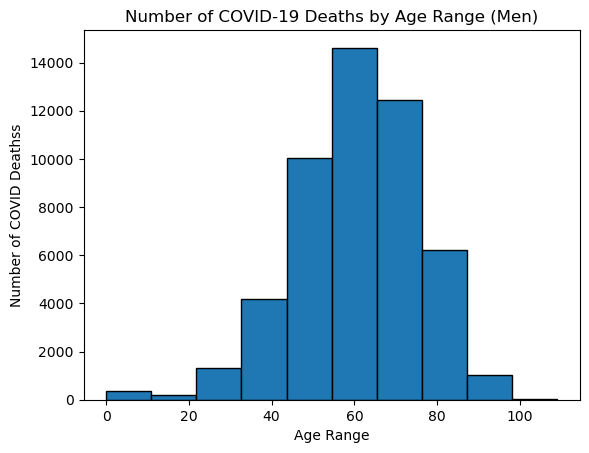

In [30]:
#Plot a Histogram to observe the number of cases considering the age range.

plt.hist(complete_data_men["EDAD"],bins=10, edgecolor= "black")

plt.xlabel("Age Range")
plt.ylabel("Number of COVID Deathss")
plt.title("Number of COVID-19 Deaths by Age Range (Men)")
plt.show()

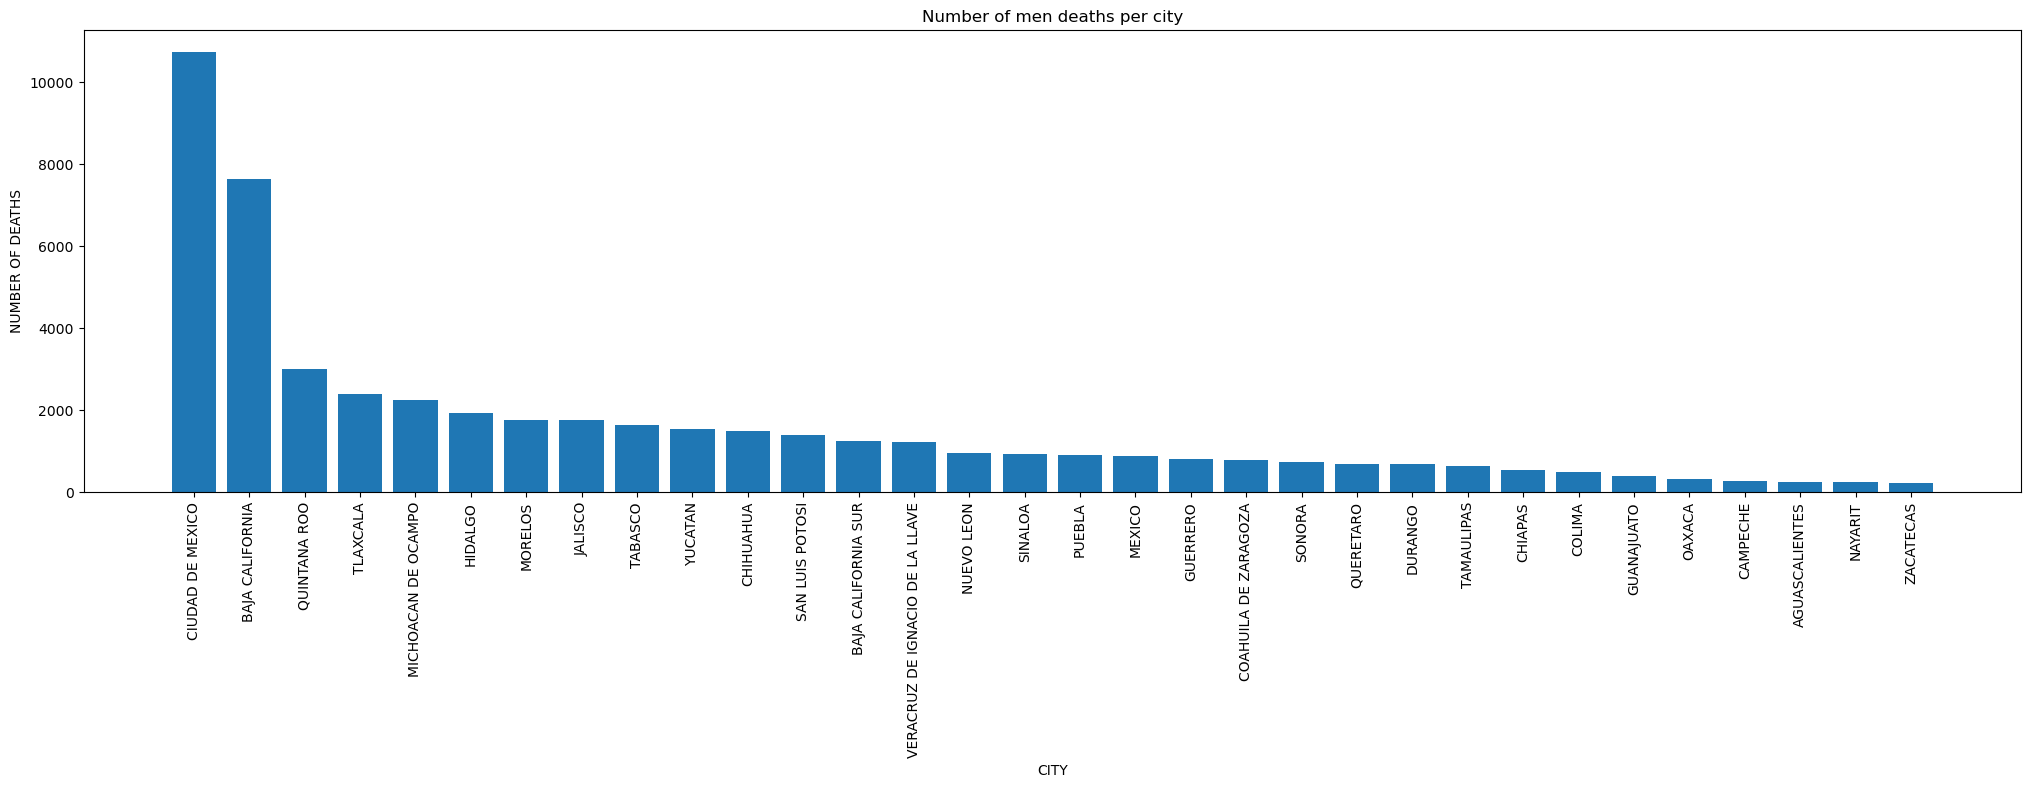

In [45]:
Cities=complete_data_men["ENTIDAD_UM"].unique()
Deaths_cities=complete_data_men["ENTIDAD_UM"].value_counts()

plt.figure(figsize=(25,6))

plt.bar(Cities,Deaths_cities)
plt.xticks(rotation=90)
plt.xlabel("CITY")
plt.ylabel("NUMBER OF DEATHS")
plt.title("Number of men deaths per city")
plt.show()

In [33]:
complete_data_women=complete_data_analysis.loc[complete_data_analysis["SEXO"]=="MUJER"]
complete_data_women

,Unnamed: 0,ID_REGISTRO,FECHA_INGRESO,FECHA_SINTOMAS,EDAD,PAIS_ORIGEN,INTUBADO,EMBARAZO,DIABETES,EPOC,...,CUIDADOS_INTENSIVOS,NACIONALIDAD,TIPO_PACIENTE,SEXO,ENTIDAD_UM,SECTOR,RESULTADO_LAB,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,RANGO DE EDAD
459,459,0420cc,17/04/2020,17/04/2020,41,NO APLICA,SI,NO,NO,NO,...,NO,MEXICANA,HOSPITALIZADO,MUJER,CIUDAD DE MEXICO,SSA,NEGATIVO,NO APLICA (CASO SIN MUESTRA),NEGATIVO,Between 41 and 50
460,460,1bbf8e,26/04/2020,24/04/2020,54,NO APLICA,SI,NO,NO,NO,...,NO,MEXICANA,HOSPITALIZADO,MUJER,CIUDAD DE MEXICO,SSA,NEGATIVO,NO APLICA (CASO SIN MUESTRA),NEGATIVO,Between 51 and 60
461,461,197cf9,20/05/2020,13/05/2020,54,NO APLICA,SI,NO,NO,NO,...,NO,MEXICANA,HOSPITALIZADO,MUJER,CIUDAD DE MEXICO,SSA,NEGATIVO,NO APLICA (CASO SIN MUESTRA),NEGATIVO,Between 51 and 60
462,462,13d2ec,21/05/2020,16/05/2020,64,NO APLICA,SI,NO,NO,NO,...,NO,MEXICANA,HOSPITALIZADO,MUJER,CIUDAD DE MEXICO,SSA,NEGATIVO,NO APLICA (CASO SIN MUESTRA),NEGATIVO,Between 61 and 70
463,463,091f0a,26/05/2020,22/05/2020,9,NO APLICA,SI,NO,NO,NO,...,NO,MEXICANA,HOSPITALIZADO,MUJER,CIUDAD DE MEXICO,SSA,NEGATIVO,NO APLICA (CASO SIN MUESTRA),NEGATIVO,<20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78729,78729,12576a,24/06/2020,12/06/2020,66,NO APLICA,NO,NO,NO,NO,...,NO,MEXICANA,HOSPITALIZADO,MUJER,CHIAPAS,ESTATAL,NO APLICA (CASO SIN MUESTRA),NO APLICA (CASO SIN MUESTRA),CASO SOSPECHOSO,Between 61 and 70
78730,78730,0da10b,13/06/2020,05/06/2020,50,NO APLICA,SI,NO,SI,NO,...,SI,MEXICANA,HOSPITALIZADO,MUJER,CHIAPAS,ESTATAL,NO APLICA (CASO SIN MUESTRA),NO APLICA (CASO SIN MUESTRA),CASO SOSPECHOSO,Between 41 and 50
78746,78746,00e41b,14/06/2020,12/06/2020,57,NO APLICA,NO,NO,SI,NO,...,NO,MEXICANA,HOSPITALIZADO,MUJER,CHIAPAS,IMSS-BIENESTAR,NO APLICA (CASO SIN MUESTRA),NO APLICA (CASO SIN MUESTRA),CASO SOSPECHOSO,Between 51 and 60
78747,78747,131ef2,03/06/2020,03/06/2020,52,NO APLICA,SI,NO,SI,NO,...,NO,MEXICANA,HOSPITALIZADO,MUJER,CHIAPAS,IMSS-BIENESTAR,NO APLICA (CASO SIN MUESTRA),NO APLICA (CASO SIN MUESTRA),CASO SOSPECHOSO,Between 51 and 60


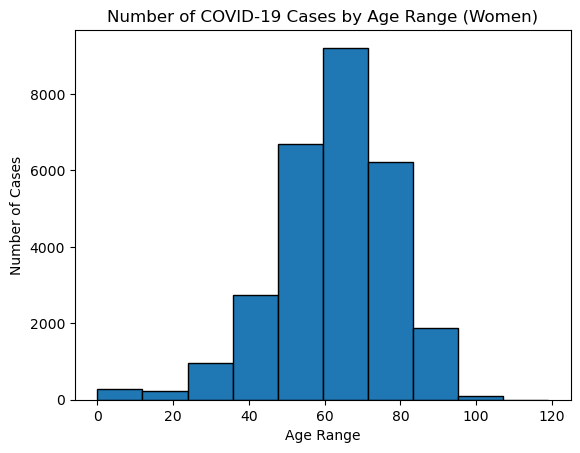

In [29]:
#Plot a Histogram to observe the number of cases considering the age range.

plt.hist(complete_data_women["EDAD"],bins=10, edgecolor= "black")

plt.xlabel("Age Range")
plt.ylabel("Number of COVID Deaths")
plt.title("Number of COVID-19 Deaths by Age Range (Women)")
plt.show()

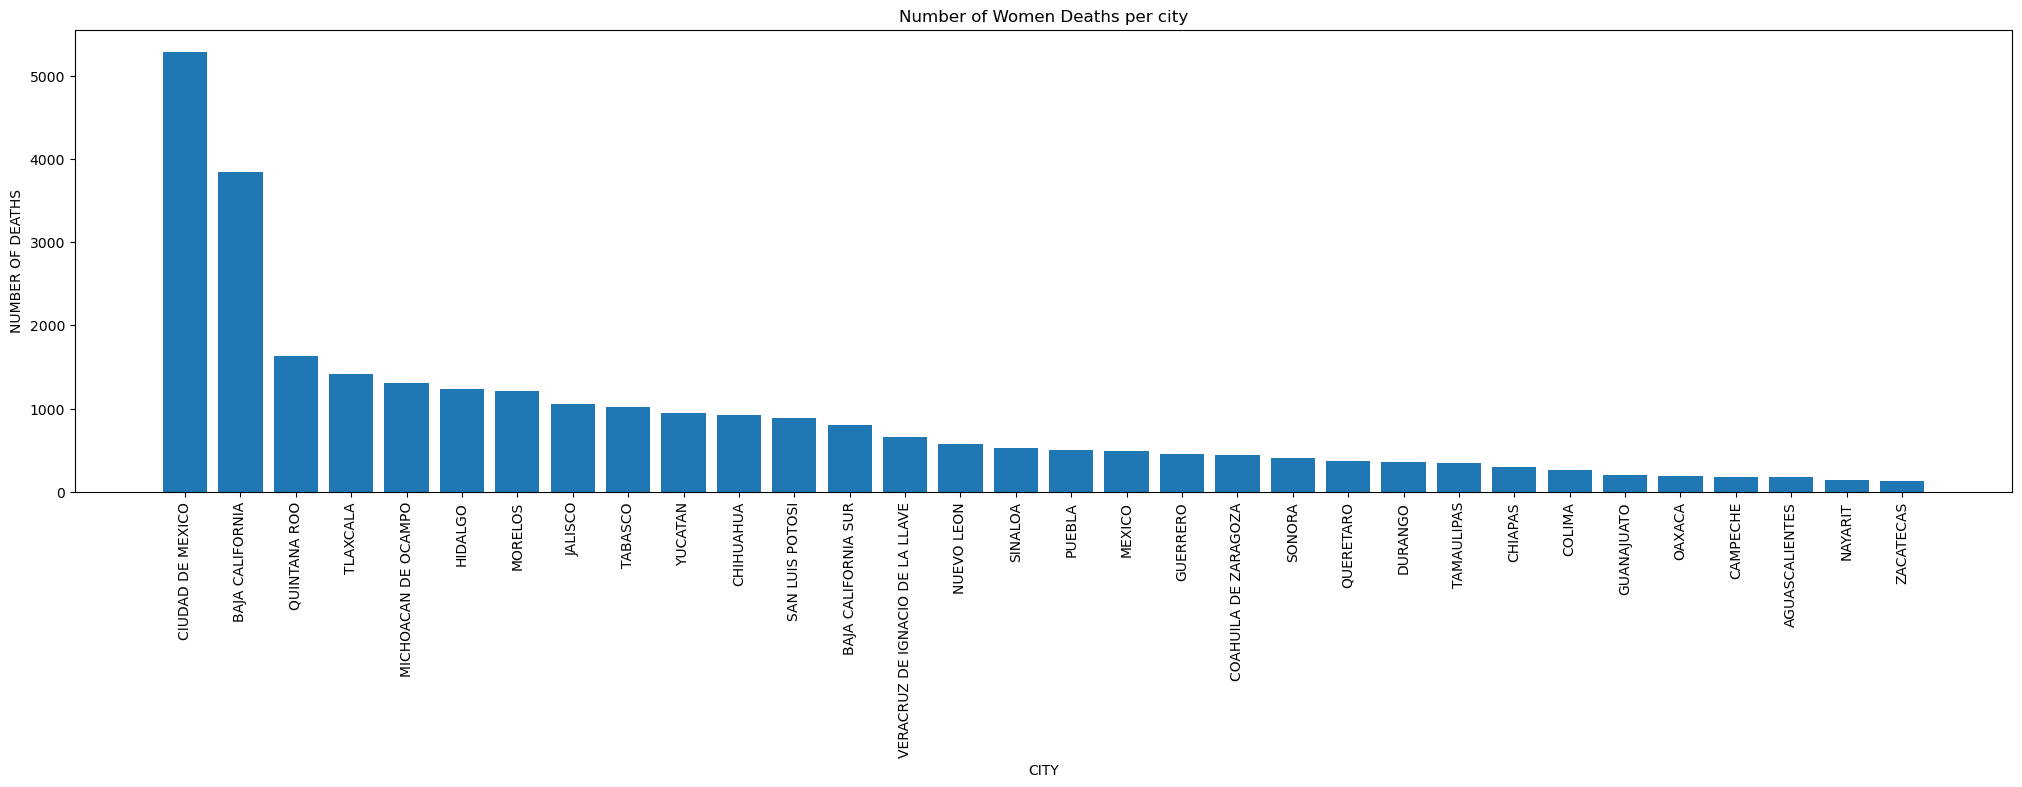

In [43]:
Cities=complete_data_women["ENTIDAD_UM"].unique()
Deaths_cities=complete_data_women["ENTIDAD_UM"].value_counts()

plt.figure(figsize=(25,6))

plt.bar(Cities,Deaths_cities)
plt.xticks(rotation=90)
plt.xlabel("CITY")
plt.ylabel("NUMBER OF DEATHS")
plt.title("Number of Women Deaths per city")
plt.show()

In [65]:
complete_data_men["INTUBADO"].unique()

array(['SI ', 'NO ', 'NO ESPECIFICADO', 'NO APLICA'], dtype=object)

In [82]:
# calculate the number of deaths by COVID with any morbidity
count_intubado_men= complete_data_men.loc[complete_data_men["INTUBADO"] == "SI "].groupby("EDAD")["INTUBADO"].count() 
count_diabetes_men= complete_data_men.loc[complete_data_men["DIABETES"] == "SI "].groupby("EDAD")["DIABETES"].count() 
count_epoc_men= complete_data_men.loc[complete_data_men["EPOC"] == "SI "].groupby("EDAD")["EPOC"].count()
count_asma_men= complete_data_men.loc[complete_data_men["ASMA"] == "SI "].groupby("EDAD")["ASMA"].count()
count_inmu_men= complete_data_men.loc[complete_data_men["INMUSUPR"] == "SI "].groupby("EDAD")["INMUSUPR"].count()
count_hipertension_men= complete_data_men.loc[complete_data_men["HIPERTENSION"] == "SI "].groupby("EDAD")["HIPERTENSION"].count()
count_cardiovascular_men= complete_data_men.loc[complete_data_men["CARDIOVASCULAR"] == "SI "].groupby("EDAD")["CARDIOVASCULAR"].count()
count_obesity_men= complete_data_men.loc[complete_data_men["OBESIDAD"] == "SI "].groupby("EDAD")["OBESIDAD"].count()
count_renal_men= complete_data_men.loc[complete_data_men["RENAL_CRONICA"] == "SI "].groupby("EDAD")["RENAL_CRONICA"].count()
count_uci_men= complete_data_men.loc[complete_data_men["CUIDADOS_INTENSIVOS"] == "SI "].groupby("EDAD")["CUIDADOS_INTENSIVOS"].count()


import pandas as pd

# Crear un DataFrame para cada Serie
df_intubado = pd.DataFrame(count_intubado_men)
df_diabetes = pd.DataFrame(count_diabetes_men)
df_epoc = pd.DataFrame(count_epoc_men)
df_asma = pd.DataFrame(count_asma_men)
df_inmu = pd.DataFrame(count_inmu_men)
df_hipertension = pd.DataFrame(count_hipertension_men)
df_cardiovascular = pd.DataFrame(count_cardiovascular_men)
df_obesity = pd.DataFrame(count_obesity_men)
df_renal = pd.DataFrame(count_renal_men)
df_uci = pd.DataFrame(count_uci_men)

# Combinar todos los DataFrames en uno solo usando pd.concat()
data_frames = [df_intubado, df_diabetes, df_epoc, df_asma, df_inmu, df_hipertension, df_cardiovascular, df_obesity, df_renal, df_uci]

# Realizar la concatenación usando el índice "EDAD"
morbidity_stats_men = pd.concat(data_frames, axis=1)

# Mostrar el DataFrame resultante
morbidity_stats_men



,INTUBADO,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,CUIDADOS_INTENSIVOS
EDAD,,,,,,,,,,
0,80.0,4.0,2.0,NaN,7.0,5.0,14.0,4.0,2.0,57.0
1,53.0,NaN,1.0,1.0,8.0,1.0,15.0,NaN,1.0,29.0
2,10.0,1.0,NaN,2.0,3.0,NaN,2.0,NaN,NaN,6.0
3,3.0,NaN,NaN,2.0,1.0,1.0,2.0,NaN,NaN,NaN
4,3.0,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN,4.0
...,...,...,...,...,...,...,...,...,...,...
100,3.0,2.0,1.0,NaN,NaN,9.0,3.0,NaN,1.0,2.0
102,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
103,1.0,NaN,NaN,NaN,1.0,2.0,NaN,NaN,NaN,1.0


In [83]:
# calculate the number of deaths by COVID with any morbidity
count_intubado_women= complete_data_women.loc[complete_data_women["INTUBADO"] == "SI "].groupby("EDAD")["INTUBADO"].count() 
count_diabetes_women= complete_data_women.loc[complete_data_women["DIABETES"] == "SI "].groupby("EDAD")["DIABETES"].count() 
count_epoc_women= complete_data_women.loc[complete_data_women["EPOC"] == "SI "].groupby("EDAD")["EPOC"].count()
count_asma_women= complete_data_women.loc[complete_data_women["ASMA"] == "SI "].groupby("EDAD")["ASMA"].count()
count_inmu_women= complete_data_women.loc[complete_data_women["INMUSUPR"] == "SI "].groupby("EDAD")["INMUSUPR"].count()
count_hipertension_women= complete_data_women.loc[complete_data_women["HIPERTENSION"] == "SI "].groupby("EDAD")["HIPERTENSION"].count()
count_cardiovascular_women= complete_data_women.loc[complete_data_women["CARDIOVASCULAR"] == "SI "].groupby("EDAD")["CARDIOVASCULAR"].count()
count_obesity_women= complete_data_women.loc[complete_data_women["OBESIDAD"] == "SI "].groupby("EDAD")["OBESIDAD"].count()
count_renal_women= complete_data_women.loc[complete_data_women["RENAL_CRONICA"] == "SI "].groupby("EDAD")["RENAL_CRONICA"].count()
count_uci_women= complete_data_women.loc[complete_data_women["CUIDADOS_INTENSIVOS"] == "SI "].groupby("EDAD")["CUIDADOS_INTENSIVOS"].count()


import pandas as pd

# Crear un DataFrame para cada Serie
df_intubado = pd.DataFrame(count_intubado_women)
df_diabetes = pd.DataFrame(count_diabetes_women)
df_epoc = pd.DataFrame(count_epoc_women)
df_asma = pd.DataFrame(count_asma_women)
df_inmu = pd.DataFrame(count_inmu_women)
df_hipertension = pd.DataFrame(count_hipertension_women)
df_cardiovascular = pd.DataFrame(count_cardiovascular_women)
df_obesity = pd.DataFrame(count_obesity_women)
df_renal = pd.DataFrame(count_renal_women)
df_uci = pd.DataFrame(count_uci_women)

# Combinar todos los DataFrames en uno solo usando pd.concat()
data_frames = [df_intubado, df_diabetes, df_epoc, df_asma, df_inmu, df_hipertension, df_cardiovascular, df_obesity, df_renal, df_uci]

# Realizar la concatenación usando el índice "EDAD"
morbidity_stats_women = pd.concat(data_frames, axis=1)

# Mostrar el DataFrame resultante
morbidity_stats_women

,INTUBADO,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,CUIDADOS_INTENSIVOS
EDAD,,,,,,,,,,
0,38.0,3.0,1.0,NaN,8.0,4.0,7.0,3.0,1.0,36.0
1,31.0,1.0,1.0,2.0,6.0,1.0,10.0,3.0,1.0,12.0
2,8.0,NaN,NaN,NaN,1.0,NaN,3.0,NaN,1.0,4.0
3,4.0,NaN,NaN,NaN,4.0,NaN,1.0,1.0,NaN,3.0
4,2.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,3.0
...,...,...,...,...,...,...,...,...,...,...
101,1.0,NaN,1.0,NaN,1.0,2.0,1.0,1.0,1.0,1.0
97,NaN,5.0,5.0,NaN,NaN,13.0,3.0,4.0,NaN,2.0
100,NaN,1.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN,2.0
